 # Projekt Big Data

W momim projekcie intepretuje dane o sprzedawanych samochodach

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
%matplotlib inline  

In [12]:
r=pd.read_csv('CenyAut2012.csv', sep = ';')

In [13]:
r.describe().T


,count,mean,std,min,25%,50%,75%,max
Cena,210134.0,55385.514496,2.022163e+05,174.0,10900.0,21300.0,44900.0,25650000.0
CenawPLN,210134.0,35790.161991,7.047526e+04,400.0,10900.0,19900.0,37400.0,11111111.0
KM,181450.0,127.529628,9.359906e+01,1.0,90.0,115.0,140.0,21754.0
kW,181450.0,93.768234,6.884593e+01,1.0,66.0,85.0,103.0,16000.0
Pojemnoscskokowa,202500.0,1944.444879,7.820368e+02,10.0,1586.0,1896.0,2000.0,151000.0
Przebiegwkm,169171.0,146941.334123,3.467856e+06,1.0,85000.0,140000.0,180000.0,999999999.0
Rok.produkcji,210134.0,2003.378021,5.559794e+00,1900.0,2000.0,2004.0,2007.0,2012.0


Według tabelki opisującej dane o sprzedawanych samochodach najwięcej samochodów miało 140 km pzebiegu i kosztowało 37400zł oaz większość samochodów wyprodukowano w 2007.

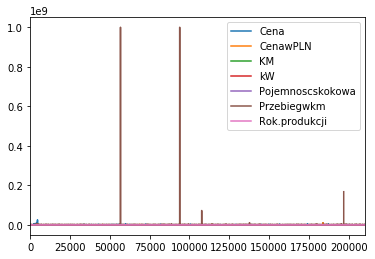

In [14]:
r.plot()

Na wykresie mamy zbiór istotnych danych o sprzedawanych samochodach

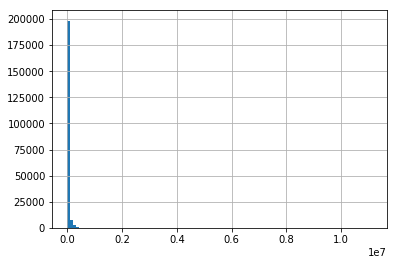

In [29]:
r.CenawPLN.hist(bins=100)

Na histgoramie cen w zł widać że wszystkie samochody są z wysokiejpołki i bardzo drogie


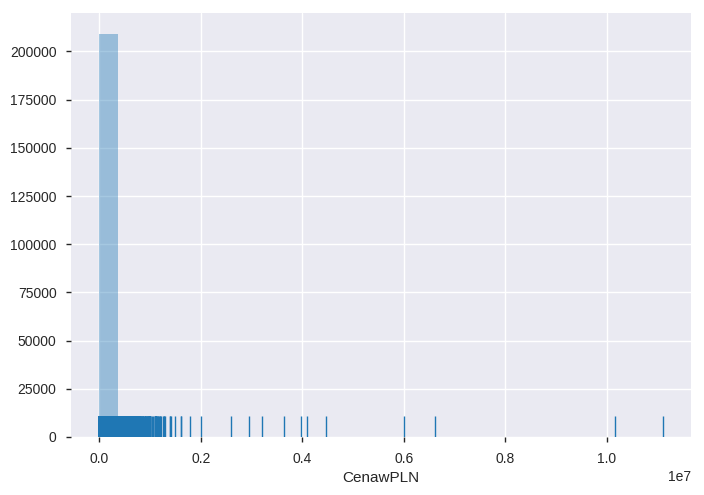

In [45]:
sns.distplot(r.CenawPLN, bins=30, kde=False, rug=True)

Na histgoramie z obserwacjami cen w zł widać jak bardzo są różne ceny samochodów z wyższej półki

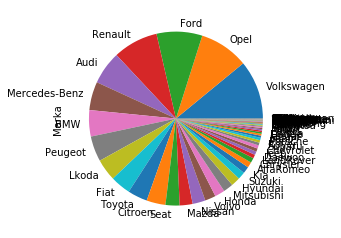

In [40]:
r.Marka.value_counts().plot.pie()

Na wykresie kołowym marek samochodów widać jak jest różnodrodna ilość marek.

In [43]:
pandas_profiling.ProfileReport(r)

Number of variables,25
Number of observations,210134
Total Missing (%),25.4%
Total size in memory,40.1 MiB
Average record size in memory,200.0 B
Numeric,6
Categorical,18
Boolean,0
Date,0
Text (Unique),0
Rejected,1


To ogólna analiza danych o sprzedawanych samochodach